## CASE STUDY - NETWORK ANAMOLY DETECTION ( MULTINOMIAL )

BUSINESS CONTEXT:

With the enormous growth of computer networks usage and the huge increase in the number of Applications running on top of it, network security is becoming increasingly more important. All The computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is Becoming more important. The research in the intrusion detection field has been mostly focused on anomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favored in commercial products due to its predictability and high accuracy, in academic research anomaly detection is typically conceived as a more powerful method due to its theoretical potential for addressing novel attacks. Conducting a thorough analysis of the recent research trend in anomaly detection, one will encounter several machine learning methods reported to have a very high detection rate of 98% ,While keeping the false alarm rate at 1%. However, when we look at the state of the art IDS Solutions and commercial tools, there is no evidence of using anomaly detection approaches, and Practitioners still think that it is an immature technology. To find the reason of this contrast, lots of research was done done in anomaly detection and considered various aspects such as learning and detection approaches, training data sets, testing data sets, and evaluation methods.

In [45]:
#Importing Required modules for the Analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 
import time
import datetime
from sklearn import preprocessing
from scipy.special import boxcox1p
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.decomposition import PCA
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import ensemble
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas_profiling as pp
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 
import time
import datetime
from sklearn import preprocessing
from scipy.special import boxcox1p
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import tree
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy
from sklearn.metrics import confusion_matrix
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from keras.callbacks import EarlyStopping


# Data preparation


In [2]:
# Reading Testing and Training txt file into pandas dataframe.

#Loading Training data

train = pd.read_csv('/home/arunn/Desktop/network analysis/train.txt', sep=",", header=None)


#Adding column names to the dataframe

train.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","last_flag"]


#Loading Testing data

test = pd.read_csv('/home/arunn/Desktop/network analysis/test.txt', sep=",", header=None)

#Adding column names to the dataframe

test.columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","attack","last_flag"]


In [3]:
#Merging train and test data since the varieties of Anomaly is not consistent across the datasets ( Train - Test data will be split after data preprocessing).

data = train.append(test)


In [4]:
#Dropping last_flag field which is irrelavant for the data analysis

data = data.drop(['last_flag'], axis = 1)

# Multinomial classification


In [5]:


#code to classify values of 'attack' field as "normal" , "DoS" , "Probe" , "R2L" or "U2R"

data.loc[data['attack'].isin(['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'worm']), 'attack'] = 'DoS'

data.loc[data['attack'].isin(['satan', 'ipsweep', 'nmap', 'portsweep', 'mscan', 'saint']), 'attack'] = 'Probe'

data.loc[data['attack'].isin(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'xlock', 'xsnoop', 'snmpguess', 'snmpgetattack', 'httptunnel', 'sendmail', 'named']), 'attack'] = 'R2L'

data.loc[data['attack'].isin(['buffer_overflow', 'loadmodule', 'rootkit', 'perl', 'sqlattack', 'xterm', 'ps']), 'attack'] = 'U2R'


In [6]:
#Dropping "mailbomb" values from the dataset since it's not categorized in the document.

data.loc[data['attack'] == 'mailbomb' , 'attack'] = np.NaN
data = data.dropna()


# Data preprocessing

In [7]:
#Viewing dataset
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
#summarizing datset
data.info()

#Inference: 
 
  #There is no null values in the dataset.
  #Protocol_type , service , flag are non numeric data hence to be encoded.
  #Target vaiable - 'attack' is non numeric data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148224 entries, 0 to 22543
Data columns (total 42 columns):
duration                       148224 non-null int64
protocol_type                  148224 non-null object
service                        148224 non-null object
flag                           148224 non-null object
src_bytes                      148224 non-null int64
dst_bytes                      148224 non-null int64
land                           148224 non-null int64
wrong_fragment                 148224 non-null int64
urgent                         148224 non-null int64
hot                            148224 non-null int64
num_failed_logins              148224 non-null int64
logged_in                      148224 non-null int64
num_compromised                148224 non-null int64
root_shell                     148224 non-null int64
su_attempted                   148224 non-null int64
num_root                       148224 non-null int64
num_file_creations             148224 n

In [9]:
#Describe the dataset

data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148224.000000,1.482240e+05,1.482240e+05,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,...,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000,148224.000000
mean,277.324327,4.030233e+04,1.712206e+04,0.000216,0.020563,0.000202,0.189753,0.004331,0.401608,0.255566,...,183.787551,119.406243,0.534430,0.084037,0.146220,0.030644,0.256628,0.251801,0.135684,0.136667
std,2463.083444,5.414955e+06,3.707183e+06,0.014692,0.240304,0.019436,2.015131,0.072319,0.490225,22.253334,...,98.574929,111.277990,0.448282,0.194278,0.308874,0.109074,0.428771,0.429998,0.322542,0.335559
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,86.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,71.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.010000,0.620000,0.530000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
#pandas profiling the dataset

pp.ProfileReport(data)

#INFERENCE:
 #It's a balanced dataset.
 #Rejecting due to multicollinearitty-  srv_rerror_rate, srv_serror_rate, dst_host_rerror_rate, dst_host_serror_rate , num_compromised, rerror_rate, serror_rate
 #Rejecting due to constant value - num_outbound_cmds
 #Fields with very high Zero value might affect the prediction hence to be scaled
 #EDA of Field wise records.

Number of variables,35
Number of observations,148224
Total Missing (%),0.0%
Total size in memory,35.6 MiB
Average record size in memory,252.0 B
Numeric,30
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [10]:
#Removing fields with high collinearity or with the constant value

data = data.drop(['srv_rerror_rate', 'srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_serror_rate' , 'num_compromised', 'rerror_rate', 'serror_rate' , 'num_outbound_cmds'], axis = 1)

In [11]:
#Skewness of the data
print(data.skew())

#Inference:

#Attributes with highly skewed data - src_bytes,dst_bytes,land,urgent,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login   
#These values needs to be scaled and normalized.


duration                        12.383875
src_bytes                      206.477399
dst_bytes                      314.626146
land                            68.037445
wrong_fragment                  12.064610
urgent                         110.232697
hot                             13.955513
num_failed_logins               22.187963
logged_in                        0.401419
root_shell                      25.665719
su_attempted                    45.060667
num_root                       250.287144
num_file_creations              86.980156
num_shells                      77.796189
num_access_files                45.229961
is_host_login                  111.127180
is_guest_login                   8.837387
count                            1.591175
srv_count                        4.657574
same_srv_rate                   -0.630750
diff_srv_rate                    4.086484
srv_diff_host_rate               2.851093
dst_host_count                  -0.867224
dst_host_srv_count               0

In [12]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,1.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,30,255,1.00,0.00,0.03,0.04,0.01,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal


In [55]:
Hist = data

In [56]:
#Label encoding non numeric data

LE =  ['protocol_type', 'service', 'flag']


for val in LE:
    categories= Hist[val].unique().tolist()
    Hist[val] = Hist[val].astype('category' ,categories)
    Hist[val] = Hist[val].cat.codes

In [48]:

OE = ['protocol_type', 'service', 'flag', 'attack']


for val in OE:
   
    Hist[val] = Hist[val].astype('category',categories=Hist[val].unique().tolist())

    Hist = pd.get_dummies(Hist,prefix=[val],columns =[val])

/home/arunn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:

x = Hist.drop(['attack_normal','attack_DoS','attack_R2L','attack_Probe','attack_U2R'], axis = 1).values
y = Hist[['attack_normal','attack_DoS','attack_R2L','attack_Probe','attack_U2R']].values


#Splitting train - test data

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [50]:

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# MODEL BUILDING

In [51]:
#Classification 

classifier = Sequential()

# Input Layer
classifier.add(Dense(100,  activation = 'relu', input_dim = 114))

# Hidden Layers
classifier.add(Dense(100, activation = 'relu'))


classifier.add(Dense(100,  activation = 'relu'))

# Output layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'sigmoid'))

# Compiling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#early stopping to stop model training when there is no imporvement in loss
early_stopping_monitor = EarlyStopping(patience=2)


# Fitting with Train Data
classifier.fit(x_train, y_train, batch_size = 10, nb_epoch = 30, validation_split=0.3, callbacks=[early_stopping_monitor])

/home/arunn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=5, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/arunn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 83005 samples, validate on 35574 samples
Epoch 1/30
83005/83005 [==============================] - 81s 976us/step - loss: 0.0341 - acc: 0.9888 - val_loss: 0.0211 - val_acc: 0.9923
Epoch 2/30
83005/83005 [==============================] - 73s 883us/step - loss: 0.0203 - acc: 0.9929 - val_loss: 0.0207 - val_acc: 0.9931
Epoch 3/30
83005/83005 [==============================] - 52s 622us/step - loss: 0.0179 - acc: 0.9937 - val_loss: 0.0184 - val_acc: 0.9932
Epoch 4/30
83005/83005 [==============================] - 31s 379us/step - loss: 0.0168 - acc: 0.9943 - val_loss: 0.0157 - val_acc: 0.9946
Epoch 5/30
83005/83005 [==============================] - 34s 404us/step - loss: 0.0158 - acc: 0.9946 - val_loss: 0.0159 - val_acc: 0.9945
Epoch 6/30
83005/83005 [==============================] - 33s 402us/step - loss: 0.0149 - acc: 0.9948 - val_loss: 0.0203 - val_acc: 0.9949


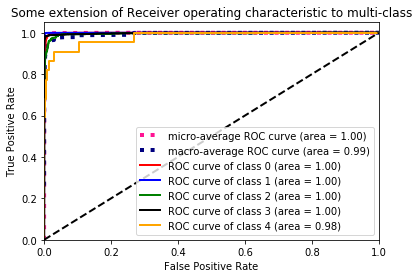

In [53]:
#Plotting AUC - ROC Classifier:

# Plot linewidth.
lw = 2

model = classifier
n_classes = 5

y_score = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


#Aggregating all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#Computing AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'blue', 'green' ,'black' , 'orange' ])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [54]:
#Importing the model

from keras.models import load_model
model.save('/home/arunn/Desktop/network analysis/FFNN_MC.h5')

#Loading the model

#my_model = load_model('my_model.h5')

# LongShortTermMemory RecursiveNeuralNetwork

In [24]:
#Transforming Input data
import numpy
trainX = numpy.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
testX = numpy.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [33]:
#Classification
model = Sequential()

#Input layer
model.add(LSTM(6, input_shape=(1, 114)))

#Hidden layer
model.add(Dense(100 ,kernel_initializer='uniform', activation='relu'))
model.add(Dense(100 , activation='relu'))

#Output layer
model.add(Dense(5 , activation='softmax'))

#Compiling
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

#Fitting model with the training data
model.fit(trainX, y_train, epochs=20)

# Final evaluation of the model
scores = model.evaluate(testX, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 6)                 2904      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 505       
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
118579/118579 [==============================] - 21s 177us/step - loss: 0.0457 - acc: 0.9839
Epoch 2/20
118579/118579 [==============================] - 22s 185us/step - loss: 0.0228 - acc: 0.9922
Epoch 3/20
118579/118579 [==============================]

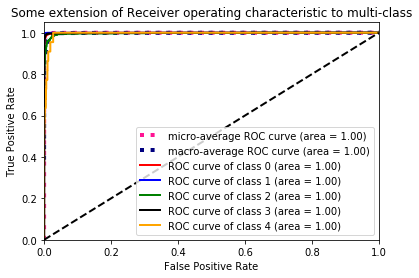

In [44]:
#Plotting AUC - ROC Classifier:

# Plot linewidth.
lw = 2

n_classes = 5

y_score = model.predict(testX)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


#Aggregating all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#Computing AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'blue', 'green' ,'black' , 'orange' ])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [65]:
#Importing the model

from keras.models import load_model
model.save('/home/arunn/Desktop/network analysis/LSTM_MC.h5')

#Loading the model

#my_model = load_model('my_model.h5')